# LogisticRegression - Multi-class Classification
### **Problem:** Identify the digits given in the 8x8 images
### **Provided:** Arrays of size 8x8 for all the images
### **Dataset used:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=load_digits#sklearn.datasets.load_digits)
### **Model used:** [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)


In [2]:
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot

We are gonna use `digits.data` as features for training the models because they have the required arrays. Then we are gonna use `digits.target` as labels for predictions because they have the actual images.

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
len(digits.data)

1797

This is how the individual 8x8 arrays will look like

In [5]:
# 8x8 array which we are gonna use for training
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

This is the corresponding 8x8 target image.

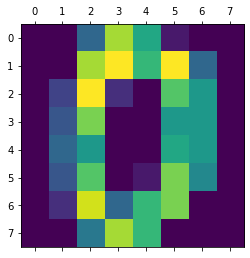

In [6]:
pyplot.matshow(digits.images[0])

## Splitting the data
We are gonna use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split) function to split our data into 4 different pieces.
### Splits:
- **X_train** will be used as "training features" for training the model
- **y_train** will be used as "training labels" for training the model
- **X_test** will be used as features for predicting the labels
- **y_test** is the actual value that was supposed to be predicting\

In [15]:
from sklearn.model_selection import train_test_split
X = np.array(digits.data)
y = np.array(digits.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 
[Source: Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

#### We are gonna use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) class provided by sklearn!!
Here our model will predict/classify the test data (X_test) into digits (from 0 to 9)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
for x in range(10):
    print(f"Prediction: {predictions[x]} Actual: {y_test[x]}")

Prediction: 7 Actual: 7
Prediction: 2 Actual: 2
Prediction: 4 Actual: 4
Prediction: 4 Actual: 4
Prediction: 2 Actual: 8
Prediction: 7 Actual: 7
Prediction: 9 Actual: 9
Prediction: 1 Actual: 1
Prediction: 0 Actual: 0
Prediction: 3 Actual: 3


/home/soham/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Data pre-processing and scaling
- If you see, theres a warning for maximum iterations in the above cell. Thats because we didn't scale and pre-process the data we had before.
- Lets create a pipeline which will pre-process the data before passing it in the model.

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [34]:
pipe_predictions = pipe.predict(X_test)
for x in range(10):
    print(f"Prediction: {pipe_predictions[x]} Actual: {y_test[x]}")

Prediction: 7 Actual: 7
Prediction: 2 Actual: 2
Prediction: 4 Actual: 4
Prediction: 4 Actual: 4
Prediction: 2 Actual: 8
Prediction: 7 Actual: 7
Prediction: 9 Actual: 9
Prediction: 1 Actual: 1
Prediction: 0 Actual: 0
Prediction: 3 Actual: 3


The `accuracy_score` function returns how good our model was in predicting the digits.

In [35]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {round(accuracy_score(y_test, pipe_predictions)*100)}%")

Accuracy: 97%


Lets try to build a confusion matrix for checking what all values the model got wrong

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pipe_predictions)
matrix

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 35]])

Lets improve visuals of the matrix but building a heatmap.

Text(69.0, 0.5, 'Actual')

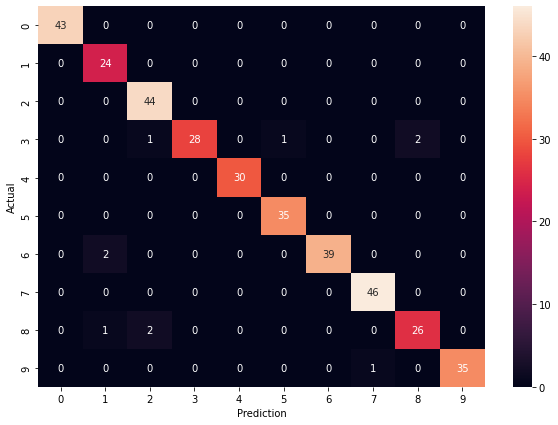

In [37]:
import seaborn
pyplot.figure(figsize=(10, 7))
seaborn.heatmap(matrix, annot=True)
pyplot.xlabel("Prediction")
pyplot.ylabel("Actual")

## Saving the model
Lets save the model for future uses using pickle

In [31]:
import pickle
with open("lr-model.pickle", "wb") as f:
    pickle.dump(model, f)